<a href="https://colab.research.google.com/github/R-A-N-N/NLPproject_Sem8/blob/main/Twitter_Problem_Detection_(Devnagiri).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authentication

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install inltk
from inltk.inltk import setup

     |████████████████████████████████| 233 kB 8.4 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 1.1 MB 1.3 MB/s 
     |████████████████████████████████| 144 kB 33.4 MB/s 
     |████████████████████████████████| 271 kB 49.8 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=b7c7b1a6c81a4f827df3287a871fee62cd0c914ac4987063abda51150d4555c3
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
setup('mr') #only for 1st time

RuntimeError: ignored

We'll only do this for the first time.


In [4]:
import os
import tweepy as tw
from time import sleep
import pandas as pd
import csv
import re 
import string
from pandas import *

In [5]:
consumer_key= 'qc8vFuKFgGzcoxbhAkREHxRoE'
consumer_secret= 'ui2u5ZnJYLPtBrTNMreRGIeRZBLwGoF1W9XPmdYvSVofWg6o6A'
access_token= '1429353996188196876-CBoTpX136goMmypFtgTk2WO4sqH0ZC'
access_token_secret= '2ETqV9DxxdlVqMEEDw9A9kbY2Dy4L4rtlOlpuAoVYuEXl'

#please copy paste all the keys which are pinned on our discord server in back-end channel 

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## MARATHI TWEETS

In [ ]:
csvFile = open('/content/drive/MyDrive/Twitter Problem Detection/Tweets(Marathi).csv', 'a')
file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames(Marathi).csv'), delimiter=',')
for line in file:
  print(line)

['आजाद नगर']
['बाळकुम ']
['भाईंदरपाड़ा ']
['ब्रह्मांड ']
['दीवा']
['ढोकळी नाका ']
['घोड़बंदर ']
['घोड़बंदर रोड ']
['जांभळी नाका ']
['जेकेग्राम ']
['कळवा ']
['कापूरबावड़ी ']
['कोलबाड रोड ']
['कोलशेत रोड ']
['कोपरी ']
['कासारवाडावली ']
['खोपट ']
['मुंब्रा ']
['माजीवाड़ा ']
['मानपाडा ']
['नौपाड़ा ']
['पांचपाखड़ी']
['पाटिल वाड़ी ']
['पातली पाड़ा ']
['पोखरण रोड ']
['पोखरण रोड नंबर 2 ']
['शिळफाटा']
['सावरकर नगर ']
['श्रीनगर ']
['ठाणे पूर्व ']
['ठाणे पश्चिम ']
['तीन हाथ नाका ']
['टैंभी नाका ']
['टिकुजीनिवाड़ी ']
['वर्तक नगर ']
['उथळसर ']
['वसंत विहार ']
['विष्णु नगर ']
['वाघबिळ']
['वागळे स्टेट']


In [ ]:
csvFile = open('/content/drive/MyDrive/Twitter Problem Detection/Tweets(Marathi).csv', 'a')
csvWriter = csv.writer(csvFile)

# Define the search term and the date_since date as variables
file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames(Marathi).csv'), delimiter=',')

for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
    str1 + ", ठाणे"
    search_words = str1
    # print(search_words)
    date_since = "2000-01-01"
    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="mr",
                  since=date_since , count= 1 ,tweet_mode="extended").items()
    tweets
    csvWriter.writerow(['Date', 'Tweet', 'Username', 'Location'])
    # Iterate and print tweets
    for tweet in tweets:
      csvWriter.writerow([tweet.created_at, tweet.full_text ,tweet.user.screen_name , tweet.user.location])
      print(tweet.full_text)



#Data cleaning 


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

In [8]:
# Load dataset
def load_data():
    data = pd.read_csv('/content/drive/MyDrive/Twitter Problem Detection/training dataset(marathi).csv')
    return data

# convert to dataframe
df = load_data()
df.head()

,Tweets,Output
0,सुते दधिष्वनश्चनः || तदिन नक्तं तद दिवा मह्यमा...,0
1,"सर्वोच्च न्यायालय म्हणाले, ओबीसी आरक्षणाशिवाय ...",0
2,"संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती, जिच्या...",0
3,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भा...,0
4,सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या अ...,0


In [9]:
# remove links
df['Tweets'] = df['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# remove text order greater than 3000 (to remove emoji)
df["Tweets"] = df["Tweets"].apply(lambda x: ''.join([i if ord(i) < 3000 else '' for i in str(x)]))
# df2.head()

# remove emoji
# df2 = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

df['Tweets'] = df['Tweets'].str.replace('(@\w+.*?)',"")
df['Tweets'] = df['Tweets'].str.replace('(#\w+.*?)',"")

# # print df
pd.set_option("display.max_colwidth", -1)
pd.set_option('display.max_rows', df.shape[0]+1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,Tweets,Output
0,सुते दधिष्वनश्चनः || तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे | वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः || तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य |,0
1,"सर्वोच्च न्यायालय म्हणाले, ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा!\n\n",0
2,"संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती, जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्ष-अवस्था प्राप्त होते, अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो.\n\n शुभदिनम्",0
3,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघ_दीपक_हैं,0
4,"सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील, तर कमेंटमध्ये जरूर कळवा!\n ाम्हणकर ाठी िनेत्री",0
5,विझण्याआधी दिवा जसा जास्त फडफडतो तसे रवी राणा यांचे झाले- ॲड. दिलीप एडतकर,0
6,रोहित पाटलांच्या या विजयाबद्दल \nआपलं काय मत आहे कमेंट बॉक्स मध्ये जरूर कळवा!\n\n,0
7,रोहित पवारांच्या कर्जत मधील विजयाबद्दल \nआपलं काय मत आहे कमेंट बॉक्स मध्ये जरूर कळवा!\n\n,0
8,मुंबईकडून कापूरबावडी जंक्शन मार्गे घोडबंदर रोडवर जाणारे सर्व वाहनांना माजीवाडा गोल्डन डाईज ब्रिजवर वाय जंक्शन येथे प्रवेश बंद करण्यात येणार आहे. या मार्गावरील अवजड वाहने नाशिक रोडने खारेगाव टोलनाका मार्गे वळविण्यात येणार आहेत.,0
9,मांगी यागावासाठी पाणीपुरवठामंत्री असताना ५०लक्ष रुपयांची पाणीपुरवठायोजना पूर्ण झाली आहे. तसेच मुख्य चौकामध्ये हायमास्ट दिवा बसविणेसाठी १.२५ लक्ष रुपये इतका निधी माझा चळवळीतीलसहकारी अजयबागल यांच्या माध्यमातून दिला आहे. यापुढेही या गावाच्या विकासासाठी निधी उपलब्ध करून देणार आह.े2/2,0


##Droping Duplicate values 

In [ ]:
df = df.drop_duplicates(subset ="Tweets", keep = False, inplace = True) #emties the whole dataframe
df

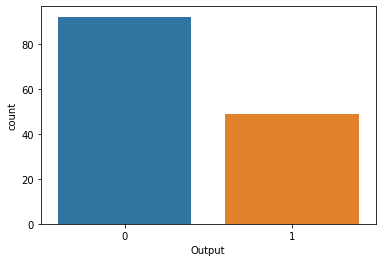

In [10]:
df2=df
sns.countplot(x = 'Output', data = df2)

##Wordcloud Visualization

In [11]:
df2['Output'] = df2['Output'].astype(str).astype(int)
df2.dtypes

Tweets    object
Output    int64 
dtype: object

In [12]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
# Start with one review:
wordCloud = WordCloud(font_path='/content/drive/MyDrive/Twitter Problem Detection/NotoSansDevanagari-Bold.ttf')
df_Related = df2[df2['Output']==1]
df_notRelated = df2[df2['Output']==0]
tweet_All = " ".join(review for review in df2.Tweets)
tweet_Realted = " ".join(review for review in df_Related.Tweets)
tweet_notRelated = " ".join(review for review in df_notRelated.Tweets)

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black", font_path='/content/drive/MyDrive/Twitter Problem Detection/AMS Vasudeva Regular.ttf').generate(tweet_All)
wordcloud_notRelated = WordCloud(max_font_size=50, max_words=100, background_color="black", font_path='/content/drive/MyDrive/Twitter Problem Detection/AMS Vasudeva Regular.ttf').generate(tweet_notRelated)
wordcloud_Realted = WordCloud(max_font_size=50, max_words=100, background_color="black", font_path='/content/drive/MyDrive/Twitter Problem Detection/AMS Vasudeva Regular.ttf').generate(tweet_Realted)

# Create and generate a word cloud image:
# wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
# wordcloud_Realted = wordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_Realted)
# wordcloud_notRelated = wordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_notRelated)

(-0.5, 399.5, 199.5, -0.5)

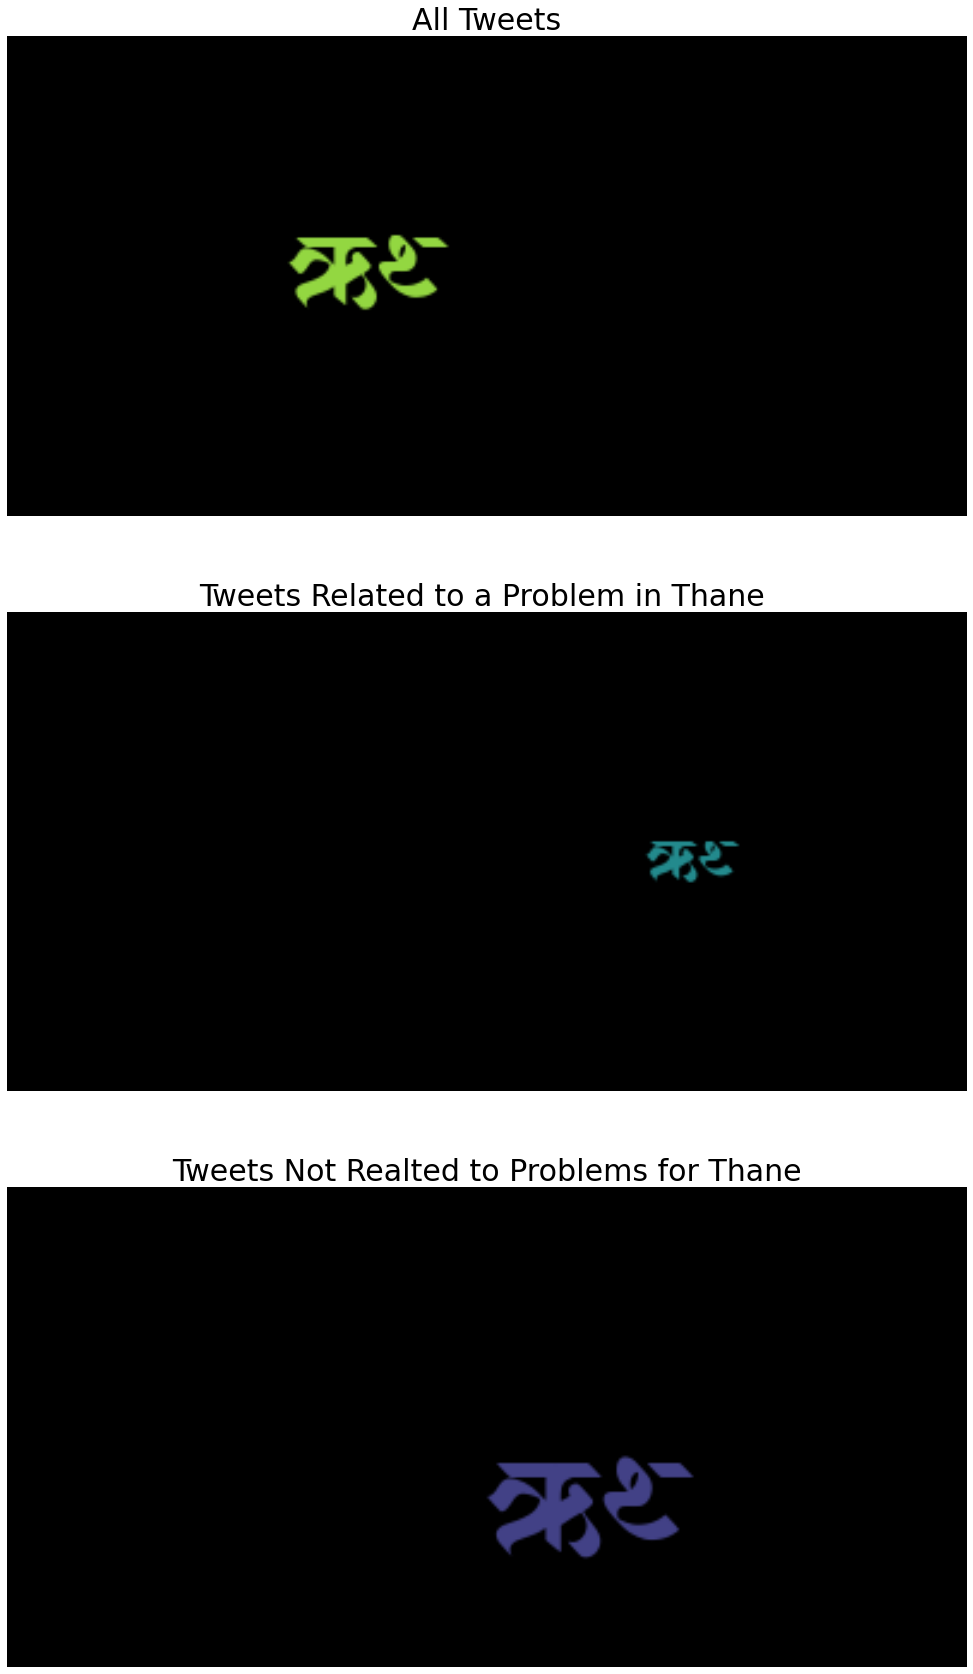

In [13]:
fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_Realted, interpolation='bilinear')
ax[1].set_title('Tweets Related to a Problem in Thane ',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_notRelated, interpolation='bilinear')
ax[2].set_title('Tweets Not Realted to Problems for Thane',fontsize=30)
ax[2].axis('off')

#Pre-processing text data

1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word


In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df2['Tweet_punct'] = df2['Tweets'].apply(lambda x: remove_punct(x))
df2.head()

,Tweets,Output,Tweet_punct
0,सुते दधिष्वनश्चनः || तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे | वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः || तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य |,0,सुते दधिष्वनश्चनः तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य
1,"सर्वोच्च न्यायालय म्हणाले, ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा!\n\n",0,सर्वोच्च न्यायालय म्हणाले ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा\n\n
2,"संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती, जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्ष-अवस्था प्राप्त होते, अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो.\n\n शुभदिनम्",0,संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्षअवस्था प्राप्त होते अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो\n\n शुभदिनम्
3,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघ_दीपक_हैं,0,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघदीपकहैं
4,"सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील, तर कमेंटमध्ये जरूर कळवा!\n ाम्हणकर ाठी िनेत्री",0,सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील तर कमेंटमध्ये जरूर कळवा\n ाम्हणकर ाठी िनेत्री


In [16]:
from inltk.inltk import tokenize
def tokenization(text):
    text = re.split('\W+', text)
    return text

df2['Tweet_tokenized'] = df2['Tweet_punct'].apply(lambda x: tokenize(x,"mr"))
df2.head()

,Tweets,Output,Tweet_punct,Tweet_tokenized
0,सुते दधिष्वनश्चनः || तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे | वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः || तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य |,0,सुते दधिष्वनश्चनः तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य,"[▁सु, ते, ▁द, धि, ष्, वन, श्च, न, ः, ▁, त, दिन, ▁न, क्त, ं, ▁, त, द, ▁दिवा, ▁मह, ्य, मा, हु, स्त, द, यं, ▁के, तो, ▁हर्, द, ▁आ, ▁वि, ▁, च, ष्ट, े, ▁वि, ▁तं, ▁यु, यो, त, ▁शव, सा, ▁वय, ▁ओ, ज, सा, ▁वि, ▁यु, ष्, मा, का, भि, र, ▁ऊ, ति, भि, ः, ▁तर, णि, र्, विश्व, दर्श, तो, ▁जय, ो, त, िष्, क्, र्द, सि, ▁सूर्य]"
1,"सर्वोच्च न्यायालय म्हणाले, ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा!\n\n",0,सर्वोच्च न्यायालय म्हणाले ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा\n\n,"[▁सर्वोच्च, ▁न्यायालय, ▁म्हणाले, ▁ओबीसी, ▁आरक्षण, ाशिवाय, ▁झालेल्या, ▁निवडणुकां, चे, ▁निकाल, ▁कळवा]"
2,"संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती, जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्ष-अवस्था प्राप्त होते, अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो.\n\n शुभदिनम्",0,संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्षअवस्था प्राप्त होते अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो\n\n शुभदिनम्,"[▁संपूर्ण, ▁, ब्रह्मांड, ▁व्याप, ून, ▁असलेली, ▁शक्ती, ▁जिच्या, ▁साक्षात्कार, ाने, ▁जीवन, मृत्यू, ▁चक्र, ातून, ▁मोक्ष, अव, स्था, ▁प्राप्त, ▁होते, ▁अशा, ▁श्री, ▁शा, क, ंभ, री, ▁देवीला, ▁सा, ष्टांग, ▁नमस्कार, ▁असो, ▁शुभ, दिन, म्]"
3,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघ_दीपक_हैं,0,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघदीपकहैं,"[▁संघ, ▁साधना, ▁राष्ट्र, ▁आराधना, ▁चंद्रशेखर, ▁आज, ा, द, ▁नगर, ▁भा, बर, ा, ▁जि, ला, ▁अली, राज, पुर, ▁, ंघ, दीपक, है, ं]"
4,"सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील, तर कमेंटमध्ये जरूर कळवा!\n ाम्हणकर ाठी िनेत्री",0,सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील तर कमेंटमध्ये जरूर कळवा\n ाम्हणकर ाठी िनेत्री,"[▁, सई, ▁ताम्हण, कर, बद्दल, ▁आणखी, ▁गोष्टी, ▁जाणून, ▁घ्या, य, च्या, ▁असतील, ▁तर, ▁क, मेंट, मध्ये, ▁जरूर, ▁कळवा, ▁, ा, म्हण, कर, ▁, ा, ठी, ▁, िने, त्री]"


In [17]:
from pandas import *
data = read_csv("/content/drive/MyDrive/Twitter Problem Detection/Stop Words(Marathi).csv")

In [18]:
import nltk
# nltk.download('stopwords')
# stopword = nltk.corpus.stopwords.words('english')
from pandas import *
data2 = read_csv("/content/drive/MyDrive/Twitter Problem Detection/Stop Words(Marathi).csv")

def remove_stopwords(text):
    text = [word for word in text if word not in data2]
    return text
    
df2['Tweet_nostopwords'] = df2['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df2.head(10)

,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords
0,सुते दधिष्वनश्चनः || तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे | वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः || तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य |,0,सुते दधिष्वनश्चनः तदिन नक्तं तद दिवा मह्यमाहुस्तदयं केतो हर्द आ वि चष्टे वि तं युयोत शवसा वय ओजसा वि युष्माकाभिर ऊतिभिः तरणिर्विश्वदर्शतो जयोतिष्क्र्दसि सूर्य,"[▁सु, ते, ▁द, धि, ष्, वन, श्च, न, ः, ▁, त, दिन, ▁न, क्त, ं, ▁, त, द, ▁दिवा, ▁मह, ्य, मा, हु, स्त, द, यं, ▁के, तो, ▁हर्, द, ▁आ, ▁वि, ▁, च, ष्ट, े, ▁वि, ▁तं, ▁यु, यो, त, ▁शव, सा, ▁वय, ▁ओ, ज, सा, ▁वि, ▁यु, ष्, मा, का, भि, र, ▁ऊ, ति, भि, ः, ▁तर, णि, र्, विश्व, दर्श, तो, ▁जय, ो, त, िष्, क्, र्द, सि, ▁सूर्य]","[▁सु, ते, ▁द, धि, ष्, वन, श्च, न, ः, ▁, त, दिन, ▁न, क्त, ं, ▁, त, द, ▁दिवा, ▁मह, ्य, मा, हु, स्त, द, यं, ▁के, तो, ▁हर्, द, ▁आ, ▁वि, ▁, च, ष्ट, े, ▁वि, ▁तं, ▁यु, यो, त, ▁शव, सा, ▁वय, ▁ओ, ज, सा, ▁वि, ▁यु, ष्, मा, का, भि, र, ▁ऊ, ति, भि, ः, ▁तर, णि, र्, विश्व, दर्श, तो, ▁जय, ो, त, िष्, क्, र्द, सि, ▁सूर्य]"
1,"सर्वोच्च न्यायालय म्हणाले, ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा!\n\n",0,सर्वोच्च न्यायालय म्हणाले ओबीसी आरक्षणाशिवाय झालेल्या निवडणुकांचे निकाल कळवा\n\n,"[▁सर्वोच्च, ▁न्यायालय, ▁म्हणाले, ▁ओबीसी, ▁आरक्षण, ाशिवाय, ▁झालेल्या, ▁निवडणुकां, चे, ▁निकाल, ▁कळवा]","[▁सर्वोच्च, ▁न्यायालय, ▁म्हणाले, ▁ओबीसी, ▁आरक्षण, ाशिवाय, ▁झालेल्या, ▁निवडणुकां, चे, ▁निकाल, ▁कळवा]"
2,"संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती, जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्ष-अवस्था प्राप्त होते, अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो.\n\n शुभदिनम्",0,संपूर्ण ब्रह्मांड व्यापून असलेली शक्ती जिच्या साक्षात्काराने जीवनमृत्यू चक्रातून मोक्षअवस्था प्राप्त होते अशा श्री शाकंभरी देवीला साष्टांग नमस्कार असो\n\n शुभदिनम्,"[▁संपूर्ण, ▁, ब्रह्मांड, ▁व्याप, ून, ▁असलेली, ▁शक्ती, ▁जिच्या, ▁साक्षात्कार, ाने, ▁जीवन, मृत्यू, ▁चक्र, ातून, ▁मोक्ष, अव, स्था, ▁प्राप्त, ▁होते, ▁अशा, ▁श्री, ▁शा, क, ंभ, री, ▁देवीला, ▁सा, ष्टांग, ▁नमस्कार, ▁असो, ▁शुभ, दिन, म्]","[▁संपूर्ण, ▁, ब्रह्मांड, ▁व्याप, ून, ▁असलेली, ▁शक्ती, ▁जिच्या, ▁साक्षात्कार, ाने, ▁जीवन, मृत्यू, ▁चक्र, ातून, ▁मोक्ष, अव, स्था, ▁प्राप्त, ▁होते, ▁अशा, ▁श्री, ▁शा, क, ंभ, री, ▁देवीला, ▁सा, ष्टांग, ▁नमस्कार, ▁असो, ▁शुभ, दिन, म्]"
3,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघ_दीपक_हैं,0,संघ साधना राष्ट्र आराधना चंद्रशेखर आजाद नगर भाबरा जिला अलीराजपुर ंघदीपकहैं,"[▁संघ, ▁साधना, ▁राष्ट्र, ▁आराधना, ▁चंद्रशेखर, ▁आज, ा, द, ▁नगर, ▁भा, बर, ा, ▁जि, ला, ▁अली, राज, पुर, ▁, ंघ, दीपक, है, ं]","[▁संघ, ▁साधना, ▁राष्ट्र, ▁आराधना, ▁चंद्रशेखर, ▁आज, ा, द, ▁नगर, ▁भा, बर, ा, ▁जि, ला, ▁अली, राज, पुर, ▁, ंघ, दीपक, है, ं]"
4,"सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील, तर कमेंटमध्ये जरूर कळवा!\n ाम्हणकर ाठी िनेत्री",0,सई ताम्हणकरबद्दल आणखी गोष्टी जाणून घ्यायच्या असतील तर कमेंटमध्ये जरूर कळवा\n ाम्हणकर ाठी िनेत्री,"[▁, सई, ▁ताम्हण, कर, बद्दल, ▁आणखी, ▁गोष्टी, ▁जाणून, ▁घ्या, य, च्या, ▁असतील, ▁तर, ▁क, मेंट, मध्ये, ▁जरूर, ▁कळवा, ▁, ा, म्हण, कर, ▁, ा, ठी, ▁, िने, त्री]","[▁, सई, ▁ताम्हण, कर, बद्दल, ▁आणखी, ▁गोष्टी, ▁जाणून, ▁घ्या, य, च्या, ▁असतील, ▁तर, ▁क, मेंट, मध्ये, ▁जरूर, ▁कळवा, ▁, ा, म्हण, कर, ▁, ा, ठी, ▁, िने, त्री]"
5,विझण्याआधी दिवा जसा जास्त फडफडतो तसे रवी राणा यांचे झाले- ॲड. दिलीप एडतकर,0,विझण्याआधी दिवा जसा जास्त फडफडतो तसे रवी राणा यांचे झाले ॲड दिलीप एडतकर,"[▁व, िझ, ण्याआधी, ▁दिवा, ▁जसा, ▁जास्त, ▁फड, फड, तो, ▁तसे, ▁रवी, ▁राणा, ▁यांचे, ▁झाले, ▁ॲड, ▁दिलीप, ▁एड, त, कर]","[▁व, िझ, ण्याआधी, ▁दिवा, ▁जसा, ▁जास्त, ▁फड, फड, तो, ▁तसे, ▁रवी, ▁राणा, ▁यांचे, ▁झाले, ▁ॲड, ▁दिलीप, ▁एड, त, कर]"
6,रोहित पाटलांच्या या विजयाबद्दल \nआपलं काय मत आहे कमेंट बॉक्स मध्ये जरूर कळवा!\n\n,0,रोहित पाटलांच्या या विजयाबद्दल \nआपलं काय मत आहे कमेंट बॉक्स मध्ये जरूर कळवा\n\n,"[▁रोहित, ▁पाटलां, च्या, ▁या, ▁विजय, ाबद्दल, ▁आपलं, ▁काय, ▁मत, ▁आहे, ▁क, मेंट, ▁बॉक्स, ▁मध्ये, ▁जरूर, ▁कळवा]","[▁रोहित, ▁पाटलां, च्या, ▁या, ▁विजय, ाबद्दल, ▁आपलं, ▁काय, ▁मत, ▁आहे, ▁क, मेंट, ▁बॉक्स, ▁मध्ये, ▁जरूर, ▁कळवा]"
7,रोहित पवारांच्या कर्जत मधील विजयाबद्दल \nआपलं काय मत आहे कमेंट बॉक्स मध्ये जरूर कळवा!\n\n,0,रोहित पवारांच्या कर्जत मधील विजयाबद्दल \nआपलं काय मत आहे क

## Stemming and Lammitization
Ex - developed, development

Stemming and Lemmatization helps us to achieve the root forms (sometimes called synonyms in search context) of inflected (derived) words. Stemming is different to Lemmatization in the approach it uses to produce root forms of words and the word produced.

In [19]:
# library for devanagiri for lammitization
!pip install stanfordnlp

import stanfordnlp

# Then download the language model for marathi (“mr”):
stanfordnlp.download('mr')

     |████████████████████████████████| 158 kB 8.9 MB/s 


ValueError: ignored

In [ ]:
val lemmatizer = new Lemmatizer()
    .setInputCols(Array("token"))
    .setOutputCol("lemma")
    .setDictionary("AntBNC_lemmas_ver_001.txt", "->", "\t")
    
val lemmatizer = new LemmatizerModel.pretrained(name="lemma", lang="de")
    .setInputCols(Array("token"))
    .setOutputCol("lemma")

SyntaxError: ignored

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df2['Tweet_stemmed'] = df2['Tweet_nostopwords'].apply(lambda x: stemming(x))
df2.head()


nlp = stanfordnlp.Pipeline(processors = "pos")


,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords,Tweet_stemmed
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visits, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, hous, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]","[, hi, hours, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]","[, hi, hour, thesr, power, suppli, area, sector, indira, nagar, lucknow, new, power, hous, call, custom, care, thri, cant, updat, system, sinc, longwho, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]","[rt, terror, oper, osama, jamia, nagar, arrest, delhi, polic, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]","[, area, azad, nagar, colaba, market, please, request, bmc, take, urgent, action, area, cant, able, walk, properly, cleaning, also, pls, take, action, nobody, comes, clean, area, ]","[, area, azad, nagar, colaba, market, pleas, request, bmc, take, urgent, action, area, cant, abl, walk, properli, clean, also, pl, take, action, nobodi, come, clean, area, ]"


In [ ]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df2['Tweet_lemmatized'] = df2['Tweet_nostopwords'].apply(lambda x: lemmatizer(x))
df2.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,Output,Tweet_punct,Tweet_tokenized,Tweet_nostopwords,Tweet_stemmed,Tweet_lemmatized
0,"Rashtriya POSHAN Maah-2021 HBYC visits by ASHA worker Savitri, Sarita and Anu in ""C"" and ""D"" Block, New Ashok Nagar, East District",0,Rashtriya POSHAN Maah HBYC visits by ASHA worker Savitri Sarita and Anu in C and D Block New Ashok Nagar East District,"[rashtriya, poshan, maah, hbyc, visits, by, asha, worker, savitri, sarita, and, anu, in, c, and, d, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visits, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]","[rashtriya, poshan, maah, hbyc, visit, asha, worker, savitri, sarita, anu, c, block, new, ashok, nagar, east, district, ]"
1,"14/1003, Sector 14, Indira Nagar, Lucknow, Uttar Pradesh 226016 New power house sector 14 indira nagar",0,Sector Indira Nagar Lucknow Uttar Pradesh New power house sector indira nagar,"[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, hous, sector, indira, nagar]","[, sector, indira, nagar, lucknow, uttar, pradesh, new, power, house, sector, indira, nagar]"
2,"hi, its been more than 7 hours thesre is no power supply in my area sector 16 indira nagar lucknow, new power house, i called customer care but thry cant update as their system is down since long...who can help",1,hi its been more than hours thesre is no power supply in my area sector indira nagar lucknow new power house i called customer care but thry cant update as their system is down since longwho can help,"[, hi, its, been, more, than, hours, thesre, is, no, power, supply, in, my, area, sector, indira, nagar, lucknow, new, power, house, i, called, customer, care, but, thry, cant, update, as, their, system, is, down, since, longwho, can, help]","[, hi, hours, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]","[, hi, hour, thesr, power, suppli, area, sector, indira, nagar, lucknow, new, power, hous, call, custom, care, thri, cant, updat, system, sinc, longwho, help]","[, hi, hour, thesre, power, supply, area, sector, indira, nagar, lucknow, new, power, house, called, customer, care, thry, cant, update, system, since, longwho, help]"
4,RT : Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell.,0,RT Terror operative Osama from Jamia Nagar arrested by Delhi Police special cell,"[rt, terror, operative, osama, from, jamia, nagar, arrested, by, delhi, police, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]","[rt, terror, oper, osama, jamia, nagar, arrest, delhi, polic, special, cell, ]","[rt, terror, operative, osama, jamia, nagar, arrested, delhi, police, special, cell, ]"
7,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area can't able to walk properly. Cleaning also pls take action nobody comes to clean our area.,1,\nThis area is Azad Nagar Colaba Market please I request bmc to take urgent action on our area cant able to walk properly Cleaning also pls take action nobody comes to clean our area,"[, this, area, is, azad, nagar, colaba, market, please, i, request, bmc, to, take, urgent, action, on, our, area, cant, able, to, walk, properly, cleaning, also, pls, take, action, nobody, comes, to, clean, our, area, ]","[, area, azad, nagar, colaba, market, please, request, bmc, take, urgent, action, area, cant, able, walk, properly, cleaning, also, pls, take, action, nobody, comes, clean, area, ]","[, area, azad, nagar, colaba, market, pleas, request, bmc, take, urgent, action, area, cant, abl,

## Vectorisation


Cleaning data in single line through passing clean_text in the CountVectorizer

In [20]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    text = re.split('\W+', text_rc)    # tokenization
    # text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [21]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df2['Tweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

141 Number of tweets has 633 words


In [22]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,a,care,dm,get,jnpt,jpg,kidnap,nh,nhai,pcmc,pimprichinchwad,rob,rt,soon,staion,take,wart,well,अ,अक,अख,अज,अजयब,अटक,अडवत,अध,अन,अनध,अप,अपघ,अपड,अभ,अमरस,अर,अल,अव,अवजड,अश,अस,...,हद,हन,हफ,हम,हर,हरकत,हरल,हल,हलत,हळ,हव,हस,हसन,हसम,ॐ,१,१००८,१२,१२५,१७०१२०२२,२,२००,२०१ह,२०२२,२२,३०,३६,४,४०,४००००,५व,५०लक,५०१०३०४,६,६व,६३०,७००,७२,८,ॲड
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Model Training and Testing

In [24]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['Tweets'], df2['Output'], random_state=1)
print('Number of rows in the total set: {}'.format(df2.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 141
Number of rows in the training set: 105
Number of rows in the test set: 36


In [25]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [27]:
predictions = naive_bayes.predict(testing_data)
print(predictions)

[0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7777777777777778
Precision score:  0.6153846153846154
Recall score:  0.7272727272727273
F1 score:  0.6666666666666667


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)

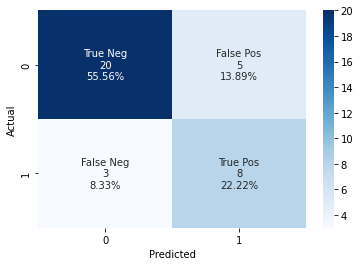

In [30]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')

## We need to decrease the False Neg, since we need a high recall for our project . Maximum of the tweets that are actually problems must be classified as problems = high recall


In [32]:
lst = [['कचरापेटी उपलब्ध नाहिये'],
       ['आज आपण घोडबंदर रोडला भेटूया'],
       ['मानपाड्याला नवीन हॉटेल चालू झालय'],
       ['इथे कायम वाहतूक कोंडी असते'],
       ['ट्रॅफिक मुळे ठाणेकरांचे हाल'],
       ['खोपट बस स्टेशनला कसं जायचं?']]

df = pd.Series((v[0] for v in lst))
trial = count_vector.transform(df)

prediction_trial = naive_bayes.predict(trial)
print(prediction_trial)

[1 0 0 1 1 1]
